In [89]:
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh import palettes
from bokeh.models import Legend

output_notebook()
%matplotlib inline

Loading BokehJS ...

In [87]:
def plot_digits(data, num_img=25):
    img_width = int(data.shape[1]**0.5)
    subplot_width = int(num_img**0.5)
    random_images_index = np.random.choice(range(data.shape[0]), size=num_img)
    plt.figure(1)
    for i, idx in enumerate(random_images_index):
        plt.subplot(subplot_width, subplot_width, i+1)
        plt.imshow(data[idx].reshape(img_width, -1))
    plt.show()
    
def plot_PCA(data):
    plt.circ(data[:, 0], data[:, 1])
    plt.show()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


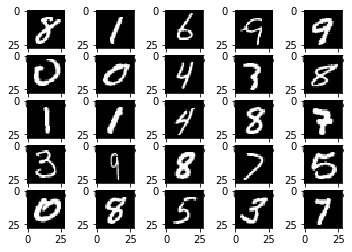

In [85]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
plot_digits(mnist.train.images)

### Do PCA on mnist:



In [74]:
pca = PCA()
pca_mnist = pca.fit_transform(mnist.train.images)

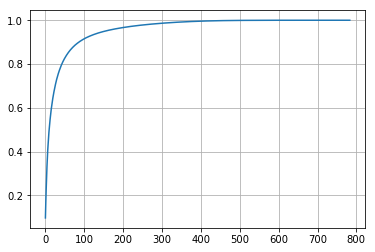

In [82]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()

In [113]:
p = figure(plot_width=600, plot_height=500)
colors = palettes.Category10_10
for digit in range(10):
    digit_imgs = pca_mnist[mnist.train.labels[:, digit]==1]
    p.circle(x=digit_imgs[:, 0], y=digit_imgs[:, 1], 
             size=2, alpha=0.8, color=colors[digit], legend=str(digit))    
p.legend.click_policy="hide"
p.legend.location = "top_right"
show(p)

In [109]:
colors[digit]

'#ff7f0e'